In [1]:
from data.data import load_data,save_data
from data.analysis.summary import summary
import matplotlib.pyplot as plt
import pandas as pd

df_01 = load_data("01")
material = df_01.pop("Material");

In [2]:
summary(df_01)

Data Summary:
Number of rows: 	 	404
Number of columns: 	 	33
Total missing values: 		1642 from 13332 cells
Rows with missing values: 	368
% of rows with missing values: 	91.09%
Percentage of missing values: 	12.32%


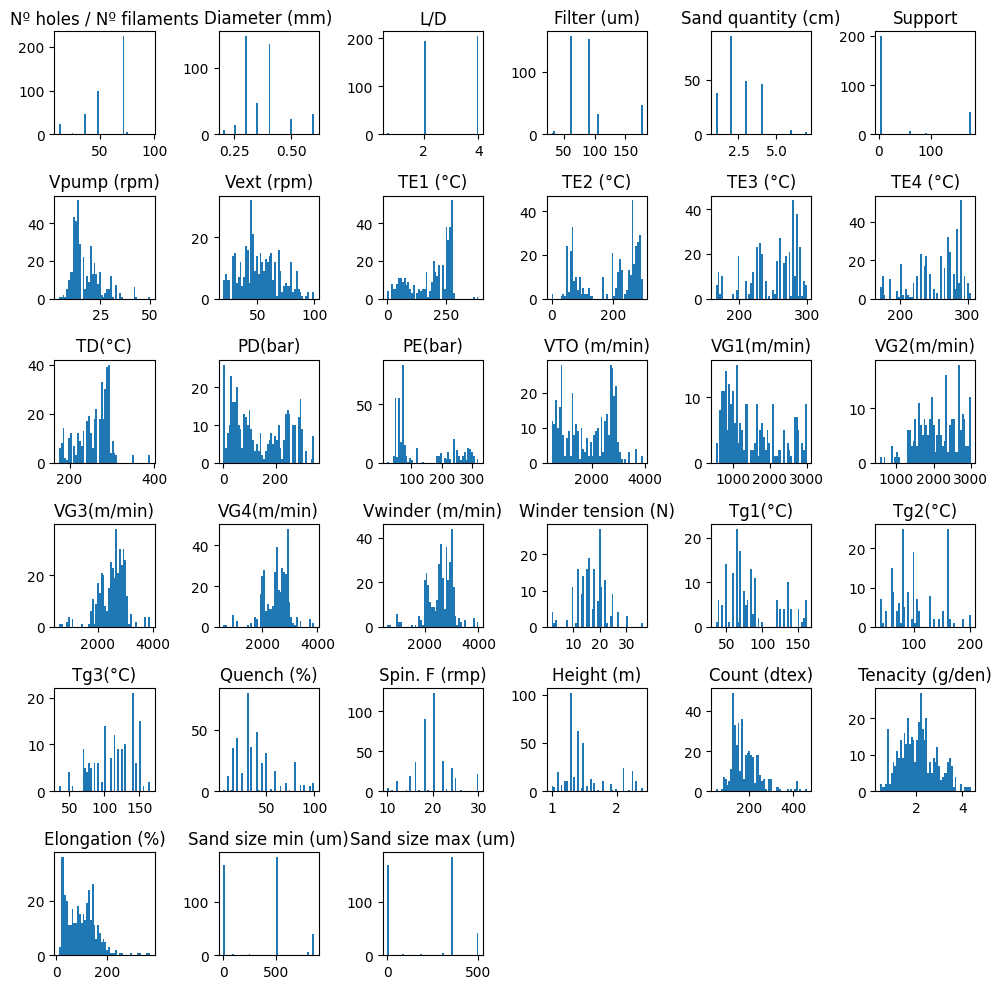

In [3]:
df_01.hist(figsize=(10, 10), bins=50, grid=False);
plt.tight_layout()

In [4]:
# see empty values by column
empty_values = df_01.isnull().sum()
# sort 
empty_values = empty_values.sort_values(ascending=False)
print("Empty values by column:")
print(empty_values[empty_values > 0])

Empty values by column:
Tg3(°C)                    249
Tg2(°C)                    236
Tg1(°C)                    235
Winder tension (N)         209
Sand quantity (cm)         175
VG2(m/min)                 164
VG1(m/min)                 164
Support                    151
Height (m)                  10
Filter (um)                  8
TE4 (°C)                     7
TE2 (°C)                     5
Vwinder (m/min)              5
TE3 (°C)                     5
L/D                          4
Quench (%)                   3
VTO (m/min)                  3
Vext (rpm)                   2
Spin. F (rmp)                2
TD(°C)                       2
PD(bar)                      2
Nº holes / Nº filaments      1
dtype: int64


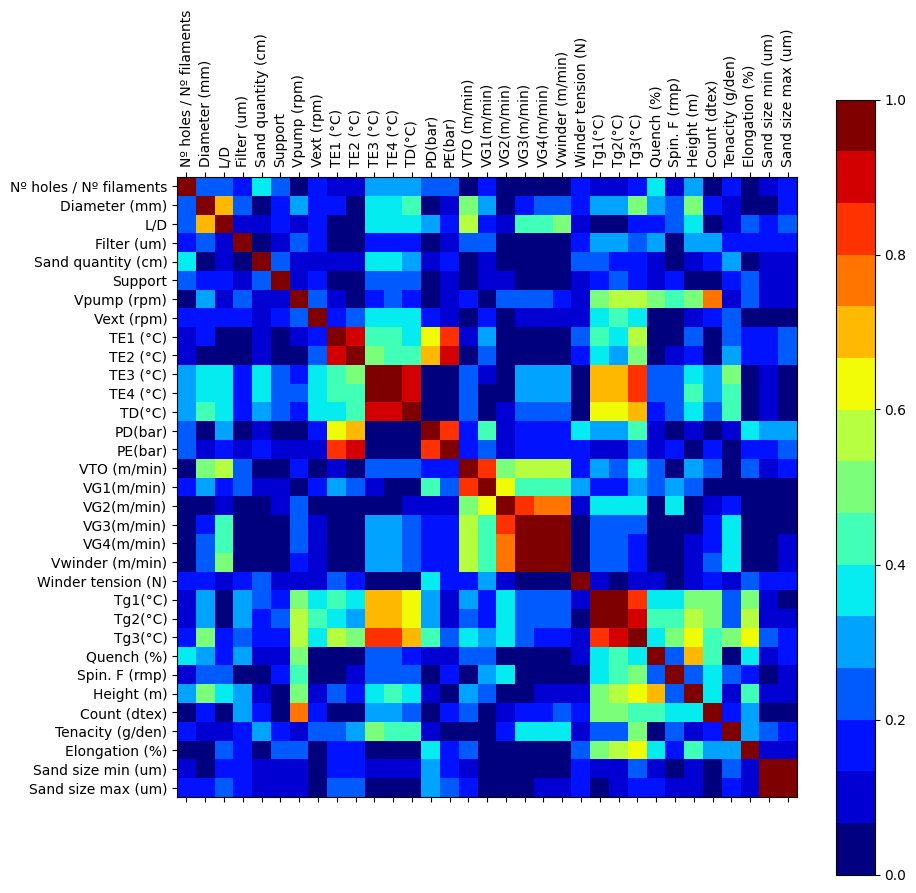

In [5]:
# correlation of Tg3ºC 

correlation = abs(df_01.corr())

# plot 
plt.figure(figsize=(10, 10))
colormap = plt.get_cmap('jet', 15)
plt.matshow(correlation, fignum=1, cmap=colormap, vmin=0, vmax=1)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90);
plt.yticks(range(len(correlation.columns)), correlation.columns);
plt.colorbar()


In [6]:
material,unique_materials = pd.factorize(material)

In [7]:
unique_materials

Index(['COPET GP001-EASTMAN', 'PLA 6100D NATUREWORKS',
       'PET + 3% Antivirico SUKANO', 'PET + 1% Bactiblock 101 R4.47',
       'PP HS61R', 'PP 561R', 'PP H561R', 'rPET + CO2 Pure', 'PA B33L',
       'PA6 PENTABATC',
       ...
       'rPET BATCH 2', 'rPET BATCH 3', 'PBS', 'Reclado químico VELOR',
       'PE ASPUN', 'SABIC M200024', 'SABIC M200056', 'PLA + CaCO3',
       'MP1924 + 0.3 TiO2', 'MP1925 + 0.3 TiO2'],
      dtype='object', length=104)

In [8]:
from data.analysis.most_correlation import most_correlation

In [9]:
top_correlations,df_numeric = most_correlation(df_01, 20)

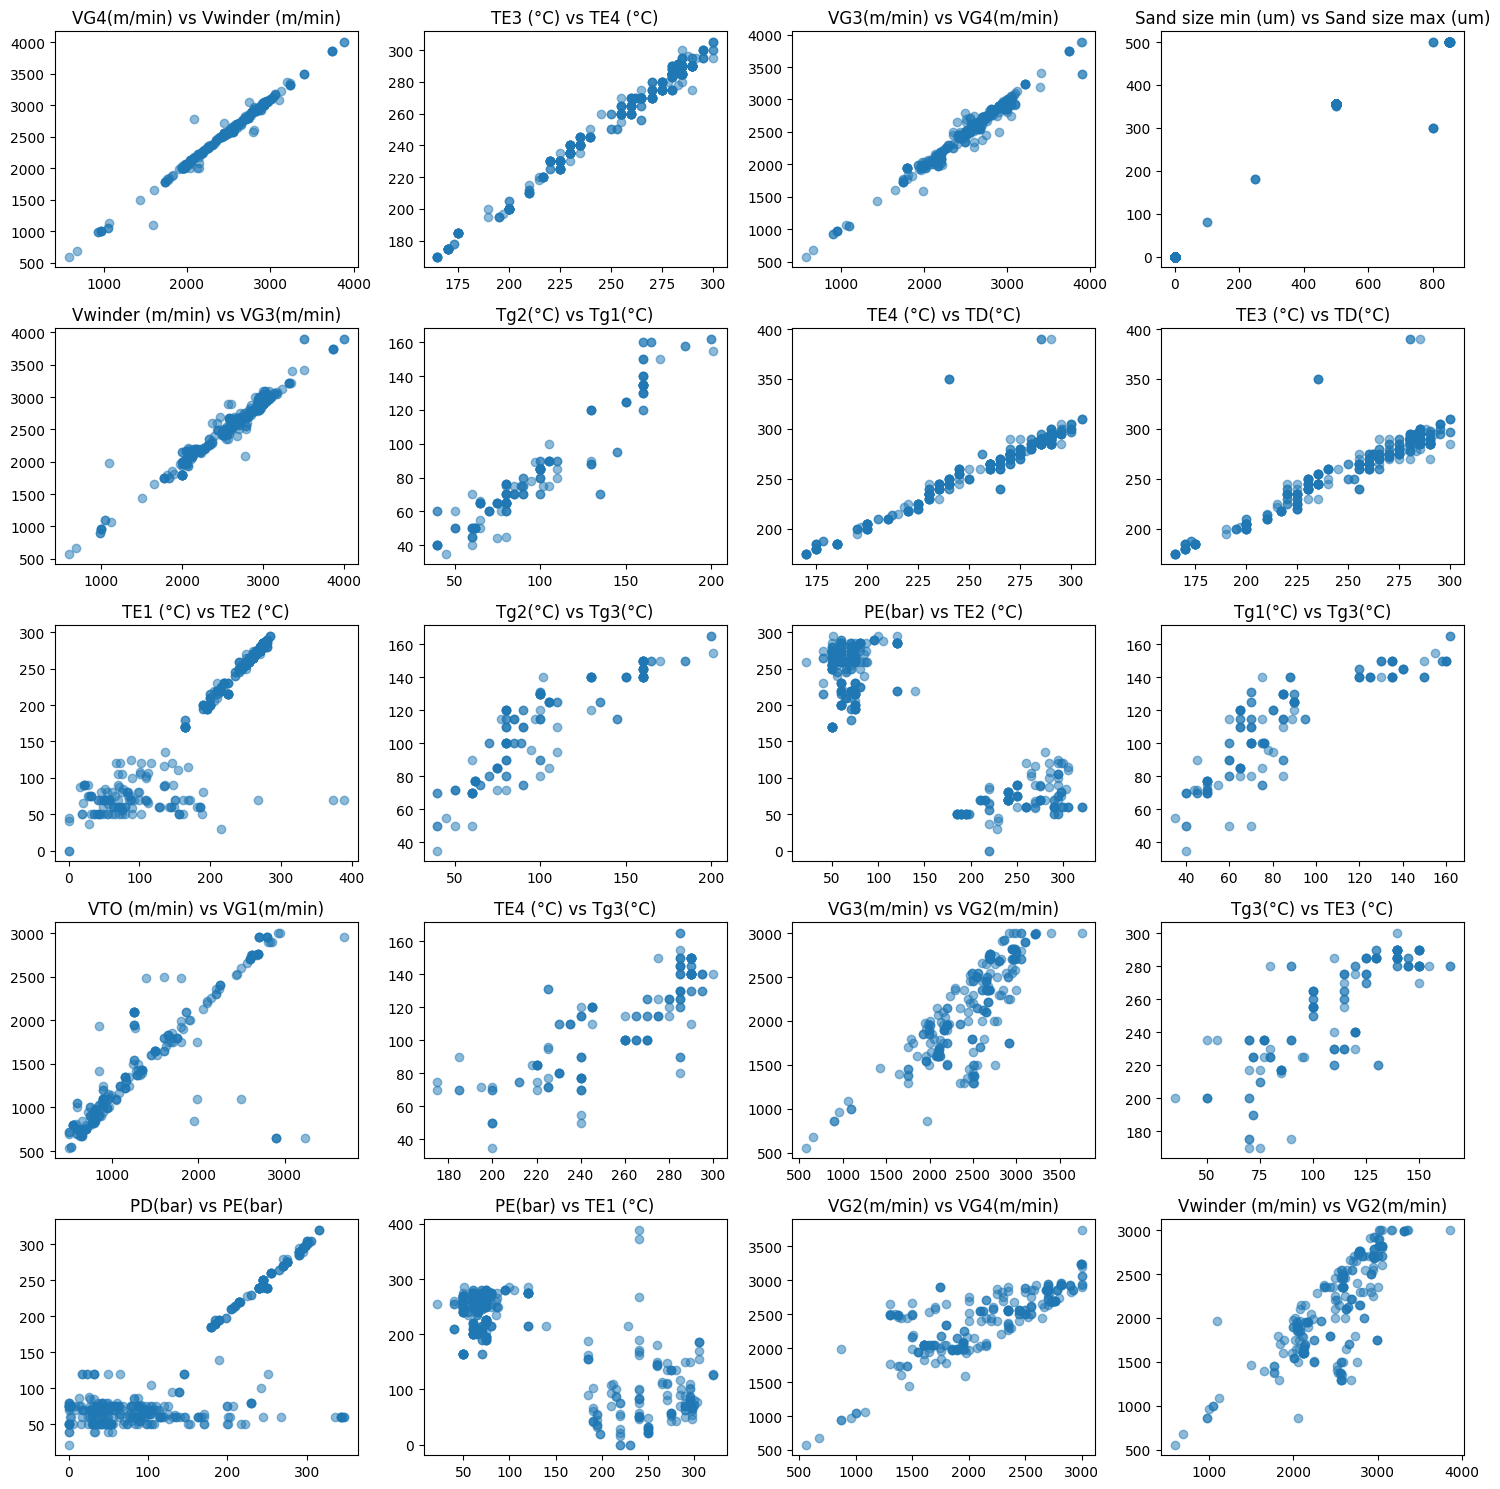

In [10]:
# plot pair of variables with highest correlation
plt.figure(figsize=(15, 15))

for j,(ivar,jvar) in enumerate(top_correlations.index):
    plt.subplot(5, 4, j + 1)
    plt.scatter(df_numeric[ivar], df_numeric[jvar], alpha=0.5)
    plt.title(f"{ivar} vs {jvar}")
plt.tight_layout()